# Multi-panel figures

We will often want to put multiple panels in a figure. In fact, take a look at the current issue of [Nature](https://www.nature.com/nature/articles?type=letter) (generally regarded as the top scientific journal in the world), and you will see *all* of the figures shown in the article listing have multiple panels. The reason is quite simply that, in general, there are multiple aspects of a single data set, experiment, etc., that tell a single story together. It is thus more effective to have these multiple aspects conveyed in a single figure so that the reader can appreciate these aspects and their interrelationships together.

In this tutorial, we will go through three methods of making multi-panel figures using `matplotlib`. The three methods offer a trade-off between ease and simplicity on the one hand power and flexibility on the other. Which you use will depend largely on your own preference and the task and hand.

As always, we need to import the needed libraries to get going.

In [1]:
# first things first
import numpy as np
import matplotlib.pyplot as plt

Next, we're going to make some data to play with. Don't worry about the code unless you want – we can just think about as a black box data generator for now. You can come back and see if you can make sense of it once we've played with the data a little bit.

In [21]:
### make some data to play with
my_means = [0, 0]
my_cov = [[2, -1.9], [-1.9, 3]]
my_n = 5000

my_rng = np.random.default_rng()
x, y = my_rng.multivariate_normal(my_means, my_cov, my_n).T
y = y**2

After running the above, we should have two vectors of data, `x` and `y`, each of which contain 5000 data points.

In the code cell below, confirm the size and shape of `x` and `y`.

In [23]:
x.shape

(5000,)

## looking at data with individual figures

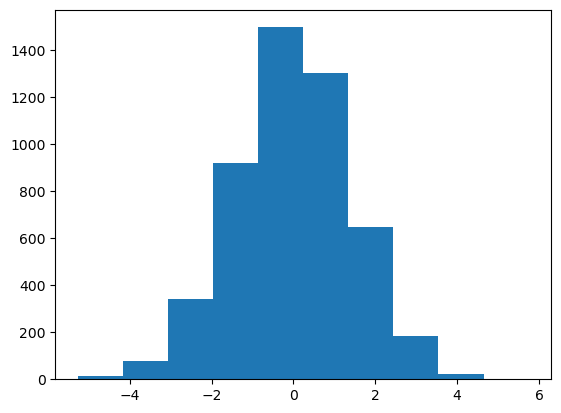

In [3]:
plt.hist(x);

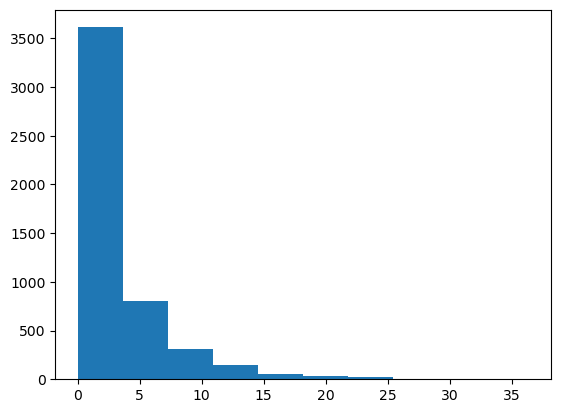

In [4]:
plt.hist(y);

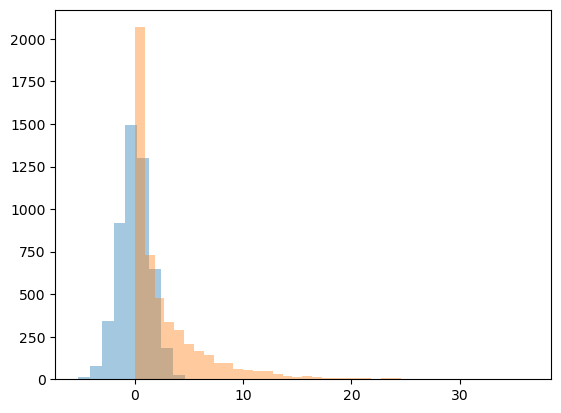

In [5]:
plt.hist(x, alpha = 0.4);
plt.hist(y, bins = 40, alpha = 0.4);

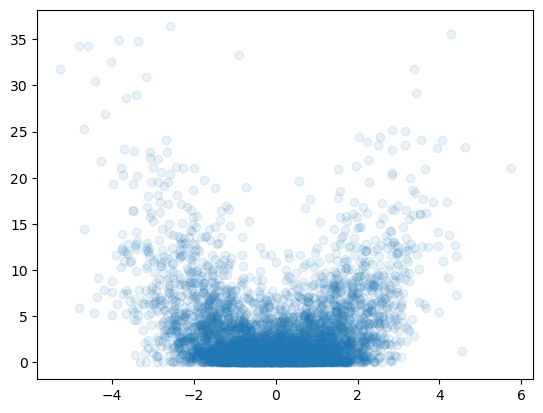

In [19]:
plt.scatter(x,y, alpha = 0.1);

## a multi-panel figure with `subplot()`

### first try

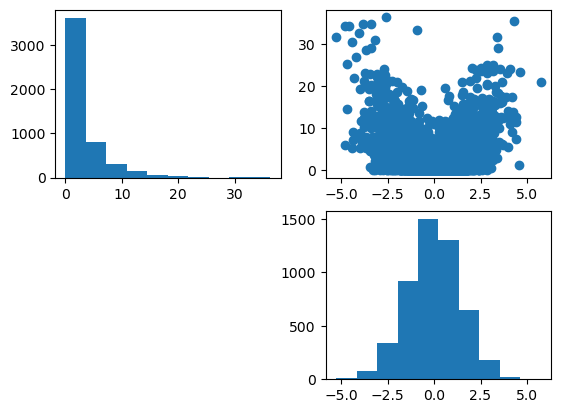

In [8]:
plt.subplot(2,2,1)
plt.hist(y);

plt.subplot(2,2,4)
plt.hist(x);

plt.subplot(2,2,2)
plt.scatter(x,y);

### adjust orientation of a subplot

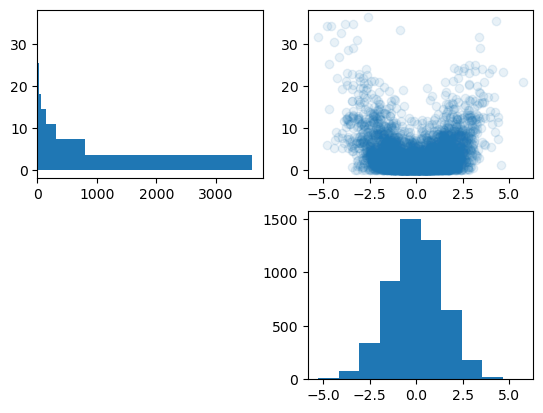

In [10]:
plt.subplot(2,2,1)
plt.hist(y, orientation = 'horizontal');

plt.subplot(2,2,4)
plt.hist(x);

plt.subplot(2,2,2)
plt.scatter(x,y, alpha = 0.1);

### arranging the plots for better visual binding

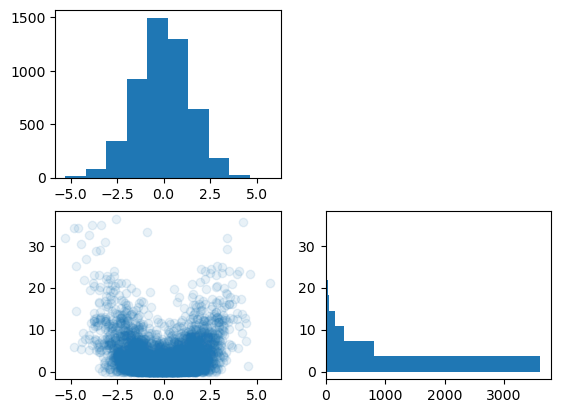

In [11]:
plt.subplot(2,2,4)
plt.hist(y, orientation = 'horizontal');

plt.subplot(2,2,1)
plt.hist(x);

plt.subplot(2,2,3)
plt.scatter(x,y, alpha = 0.1);

### adding subplots with `subplots()`

Text(0.5, 0.98, 'plt.subplots()')

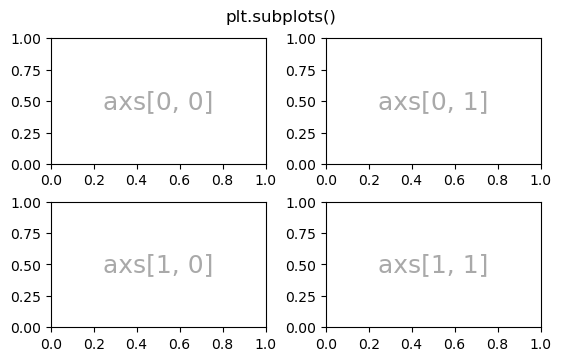

In [16]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(5.5, 3.5),
                        layout="constrained")
# add an artist, in this case a nice label in the middle...
for row in range(2):
    for col in range(2):
        axs[row, col].annotate(f'axs[{row}, {col}]', (0.5, 0.5),
                               transform=axs[row, col].transAxes,
                               ha='center', va='center', fontsize=18,
                               color='darkgrey')
fig.suptitle('plt.subplots()')

### adding subplots with a gridspec

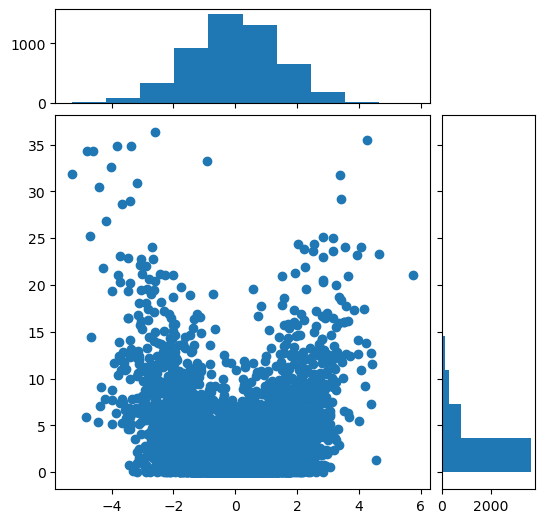

In [15]:
# Start with a square Figure.
fig = plt.figure(figsize=(6, 6))
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)


# no labels
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)

# the scatter plot:
ax.scatter(x, y);

# now determine nice limits by hand:
#binwidth = 0.25
#xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
#lim = (int(xymax/binwidth) + 1) * binwidth
#bins = np.arange(-lim, lim + binwidth, binwidth)

ax_histx.hist(x);
ax_histy.hist(y, orientation='horizontal');